In [2]:
import pandas as pd

ball = pd.read_csv("../data/raw/deliveries.csv")
matches = pd.read_csv("../data/raw/matches.csv")

print(ball.head())
print(matches.head())

   match_id  inning           batting_team                 bowling_team  over  \
0    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
1    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
2    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
3    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
4    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   

   ball       batter   bowler  non_striker  batsman_runs  extra_runs  \
0     1   SC Ganguly  P Kumar  BB McCullum             0           1   
1     2  BB McCullum  P Kumar   SC Ganguly             0           0   
2     3  BB McCullum  P Kumar   SC Ganguly             0           1   
3     4  BB McCullum  P Kumar   SC Ganguly             0           0   
4     5  BB McCullum  P Kumar   SC Ganguly             0           0   

   total_runs extras_type  is_wicket player_dismissed dismissal_kind fielder  
0

##### Checking the null values and counting them


In [3]:
ball.isnull().sum()
matches.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [4]:
ball.columns = ball.columns.str.lower().str.replace(" ","_")
matches.columns = matches.columns.str.lower().str.replace(" ","_")


##### Convert date column to datetime format

In [5]:
matches['date'] = pd.to_datetime(matches['date'],errors ='coerce')


##### Seperate the numericals and categorical columns

In [6]:
num_cols = matches.select_dtypes(include=['int64','float64']).columns
obj_cols = matches.select_dtypes(include=['object']).columns

##### Fill the NULL values in numerical -> with 0     and    categorical ->  with "Unknown"

In [7]:
num_cols = num_cols.fillna(0)
obj_cols = obj_cols.fillna("Unknown")

In [8]:
print(matches.isnull().sum())

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64


##### Filling the missing details 


In [9]:
matches['winner'].fillna('No Result',inplace=True)
matches['player_of_match'].fillna('Unknown',inplace=True)

ball['player_dismissed'].fillna('Not Out',inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_20344\3381584953.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches['winner'].fillna('No Result',inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_20344\3381584953.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

##### Removing the duplicate records

In [10]:
ball = ball.drop_duplicates()
matches = matches.drop_duplicates()


##### Merging two dataframes


In [12]:

ipl = ball.merge(matches[['id','date','venue','team1','team2']], left_on='match_id',right_on='id')
ipl.to_csv("../data/cleaned/ipl_cleaned.csv",index=False)

In [13]:
ipl.drop(columns=['id'],inplace=True)

### EDA (Exploratory Data Analysis)

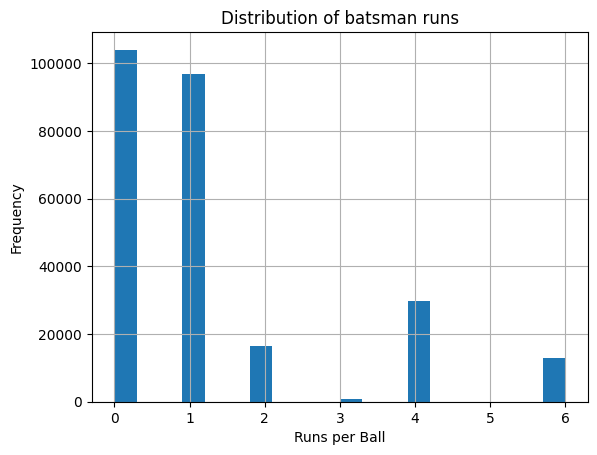

In [20]:
import matplotlib.pyplot as plt
plt.figure()

ipl['batsman_runs'].hist(bins=20)
plt.title("Distribution of batsman runs")
plt.xlabel("Runs per Ball")
plt.ylabel("Frequency")
plt.show()

##### Wicket distribution

is_wicket
0    247970
1     12950
Name: count, dtype: int64


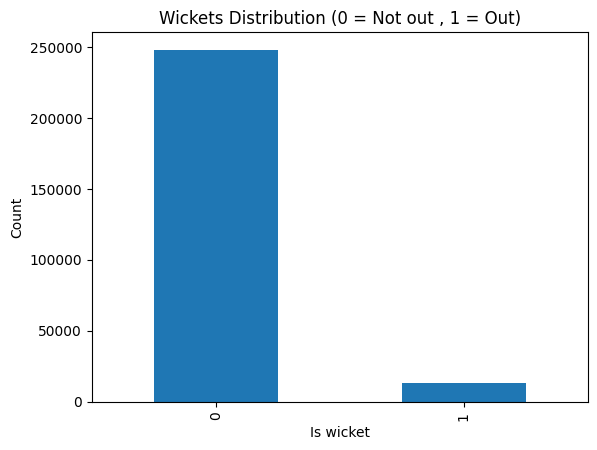

In [22]:
print(ipl['is_wicket'].value_counts())

plt.figure()
ipl['is_wicket'].value_counts().plot(kind='bar')
plt.title("Wickets Distribution (0 = Not out , 1 = Out)")
plt.xlabel("Is wicket")
plt.ylabel("Count")
plt.show()

##### Venue stats

In [34]:
print("\n Top venues by average runs")
print( ipl.groupby('venue')['batsman_runs']
      .mean()
      .sort_values(ascending=False)
      .head()
)


 Top venues by average runs
venue
Eden Gardens, Kolkata                                                 1.487558
Himachal Pradesh Cricket Association Stadium, Dharamsala              1.482688
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam    1.476000
M Chinnaswamy Stadium, Bengaluru                                      1.472393
Arun Jaitley Stadium, Delhi                                           1.465556
Name: batsman_runs, dtype: float64


##### Team Performance

In [37]:
print("\n Top teams by total runs")
print( ipl
      .groupby('batting_team')['batsman_runs']
      .sum()
      .sort_values(ascending=False)
      .head()
)


 Top teams by total runs
batting_team
Mumbai Indians                 39946
Kolkata Knight Riders          37149
Chennai Super Kings            36739
Royal Challengers Bangalore    35810
Rajasthan Royals               33074
Name: batsman_runs, dtype: int64
